Hello! Please provide your user name so the necessary files on this computer can be accessed.


 rveenstra


Please provide the name of a nitrate datasheet:


 LIF Ashland Nit 12-13-18


  Sample Name  410 nm   [A]
0         1_1         0.004
1         1_2         0.003
2         2_1         0.001
3         2_2         0.003
4        0.00         0.006
Please provide the name of the corresponding ureide datasheet:


 LIF Ashland 11-15-18


  Sample Name  535 nm   [A]
0         1_1         0.008
1         1_2         0.005
2         2_1         0.004
3         2_2         0.005
4        0.00         0.003
Ureide Calibration Curve


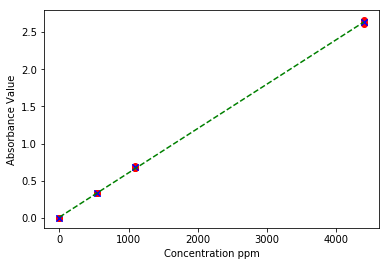

absorbance = 0.000596(concentration) + 0.012321
concentration = (absorbance - 0.012321) / 0.000596


,ID,Concentration
0,1_1,-7.25
1,1_2,-12.284
2,2_1,-13.962
3,2_2,-12.284
4,0.00,Error
5,0.00,Error
6,0.00,Error
7,1500.0,548.124
8,1500.0,548.124
9,1500.0,548.124


In [6]:
import glob
import pandas as pd
import numpy
import matplotlib.pylab as plt
import scipy
import pylab

print("Hello! Please provide your user name so the necessary files on this computer can be accessed.")
user_name = input()

data_file_n = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Nitrates'

glob.os.chdir(data_file_n)

print("Please provide the name of a nitrate datasheet:")
n_data = input()

nit_df = pd.read_csv(str(n_data) + '.csv')
print(nit_df.head(5))

data_file_u = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Ureides'

glob.os.chdir(data_file_u)

print('Please provide the name of the corresponding ureide datasheet:')
u_data = input()

ur_df = pd.read_csv(str(u_data) + '.csv')
print(ur_df.head(5))

#### AFTER IMPORTING STEP, these are the steps for the ureides...

ur_df.rename(columns = {'Sample Name':'ID', '535 nm   [A]':'B'}, inplace=True)

## names of columns are different from nitrates file

ur_g = ur_df.groupby('ID')

ur_final=ur_df.merge(ur_g.mean(),on='ID')
ur_final2=ur_final.merge(abs(ur_g.max()-ur_g.min())/ur_g.max(), on='ID')
ur_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

c_u = (0,0,0,549.6,549.6,549.6,1099.2,1099.2,1099.2,4400,4400,4400)
a_u = ur_final2.iloc[4:16, 1]
m_u = ur_final2.iloc[4:16, 2]

pylab.plot(c_u, a_u, "ro")
pylab.plot(c_u, m_u,'bx')
pylab.ylabel("Absorbance Value")
pylab.xlabel("Concentration ppm")

z_u = numpy.polyfit(c_u, m_u, 1, rcond=None, full=False, w=None, cov=False)
p_u = numpy.poly1d(z_u)
pylab.plot(c_u, p_u(c_u),"g--")
print("Ureide Calibration Curve")
pylab.show()
print("absorbance = %.6f(concentration) + %.6f"%(z_u[0],z_u[1]))
print("concentration = (absorbance - %.6f) / %.6f"%(z_u[1],z_u[0]))

x_u=z_u[1]
y_u=z_u[0]

Concentration_u = []

for key, row in ur_final2.iterrows():
    if float(row['Var']) > 0.1:
        Concentration_u.append('Error')
    else:
        Concentration_u.append(((float(row['Mean']) -x_u)/y_u).round(3))
        
ur_final2["Concentration"] = Concentration_u
ur_final2
Ureide_final = ur_final2.drop(ur_final2.columns[[1, 2, 3]], axis=1)
Ureide_final